# Майнор "Интеллектуальный анализ данных", курс "Введение в машинное обучение". Первая консультация по проектам: подготовка, визуализация и очистка данных.

In [1]:
import numpy as np
import pandas as pd

### Процесс решения задачи анализа данных:
1. Подготовка данных
1. Визуализация данных
1. Очистка данных
1. Решение задачи:
    * Построение моделей
    * Придумывание новых признаков
    * Подбор гиперпараметров моделей
    * Построение композиций алгоритмов
    * Все это много раз и в разном порядке, пока результаты нас не удовлетворят
    
________________________________________       
<font color="blue" size=4> Первые два пункта нужно сделать до конца модуля... </font>

### Подготовка данных
__Зачем?__ Очевидно

__Цель?__ Получить матрицу объекты-признаки

__Как?__ Зависит от источника данных. Варианты:
* Данные выданы в виде csv $\Rightarrow$ <font color="blue"> Вам повезло! </font>
* Текстовые данные: предобработка (лемматизация, удаление стоп-слов...), преобразование в матрицу объекты признаки (например, <<мешок слов>>: объекты - отдельные документы, признаки - отдельные слова). <font color="blue"> Это вы делали во втором ДЗ! Поможет модуль nltk </font>
* Изображения: преобразование в матрицу объекты-признаки попиксельно и/или определение, что изображено и/или поиск дополнительной информации. <font color="blue"> Не в этом курсе (хотя, если очень хотите...)! </font>
* Базы данных: извлечение признаков с применением sql и составление матрицы объекты-признаки. <font color="blue"> Не в этом курсе (хотя, если очень хотите...)! </font>
* Веб-данные: скачивание страниц, извлечение нужной информации, преобразование. <font color="blue"> Помогут модули BeautifulSoup, lxml </font> 
* Для других случаев подход индивидуален

Сегодня подробнее рассмотрим тексты и веб

### Визуализация данных
__Зачем?__ Чтобы лучше почувствовать данные, понять, какими методами можно пользоваться, подготовиться к следующему шагу (очистка данных)

__Цель?__ Нарисовать __красивые__ и __информативные__ картинки

__Как?__ 
* matplotlib <font color="blue"> Уже изучили! </font>
* pandas <font color="blue"> Уже изучили! </font>
* seaborn: красивая графика в python, установка: pip install seaborn или conda install seaborn
* другие крутые модули, <font color="blue"> погуглите python beautiful visualization </font>, если хотите :)

<font color="blue"> Немного визуализации будет в третьем ДЗ! </font> Сегодня тоже разберем примеры

### Очистка данных
__Зачем?__ Чтобы алгоритмы лучше работали

__Цель?__ Хорошая матрица объекты-признаки

__Как?__ В основном все умеет pandas. <font color="blue"> Немного было в первом ДЗ. </font>

Подробнее на следующей консультации

## Подготовка данных. Предобработка текстов.
### Удаление всего ненужного
Пунктуации, ссылок, хештегов (хотя их лучше оставлять)...

* Модуль __re__ + google, если вы не знаете регулярных выражений


In [55]:
import re

text1 = "Let Me Google That For You (abbreviated LMGTFY) is a single serving site powered by Google’s search engine that "\
       "can simulate a custom search query in an animated sequence.    LMGTFY is typically linked in forum discussions or "\
       "comments on social networking sites as a sarcastic response to a question that can be easily answered by using" \
        "a search engine, similar to the use of the acronym RTFM."

text2 = re.sub('[^0-9a-zA-Z ]', '', text1)
        
print text2

Let Me Google That For You abbreviated LMGTFY is a single serving site powered by Googles search engine that can simulate a custom search query in an animated sequence    LMGTFY is typically linked in forum discussions or comments on social networking sites as a sarcastic response to a question that can be easily answered by usinga search engine similar to the use of the acronym RTFM


### Лемматизация - приведение слов в начальную форму

* Английский язык: __nltk__, pymorphy. Кроме самого модуля понадобится __установить словари__ (ребята, гугл, все в семинар не влезет. Хотя nltk сам все расскажет при попытке что-то лемматизировать.)
* Русский язык: __mystem__ (by Yandex) - работает из консоли, можно вызвать из python, pymorphy.

Перед лемматизацией нужно сделать __токенизацию__ - разделить текст на слова. Это тоже умеет nltk (и делает это лучше, чем split!)

In [54]:
# для англйиского язка

import nltk
from nltk import WordNetLemmatizer
from nltk import tokenize

# nltk.download() - установка словарей

wnl = nltk.WordNetLemmatizer()

tokens = tokenize.word_tokenize(text2)

tokens_new = []
for word in tokens:
    word_new = wnl.lemmatize(word)
    tokens_new.append(word_new)

for w1, w2 in zip(tokens, tokens_new)[35:40]: # в английском мало чего нужно лемматизировать
    print w1, "->", w2

discussions -> discussion
or -> or
comments -> comment
on -> on
social -> social


In [ ]:
# для русского языка

# Тексты должны лежать отдельными файлами в одной папке!!!

# устанавливаем mystem
# пишем в консоли mystem --help 
# и решаем, как запускать.

# Но из консоли можно запускать только на одном файле. Вот как это можно сделать из питона для списка файлов:

import system
files_list = ["smth1.txt", "smth2.txt", "smth3.txt"] 
# Предположим, что эти файлы лежат в папке before_mystem, и создана пустая папка after_mystem 
# (все в той же директории, что и ipython)

for filename in files_list:
    os.system("mystem -n -w -d -l before_mystem/"+file+".txt after_mystem/"+file)

In [76]:
### Удаление стоп-слов

# русский
from stop_words import get_stop_words
stop_words = get_stop_words("russian")
print len(stop_words)

# английский
from nltk.corpus import stopwords
stop_words = stopwords.words()
print len(stop_words)

421
2431


Очистку, токенизацию, лемматизацию и удаление стоп слов нужно сделать для каждого документа, а затем собрать из них мешок слов. Это можно делать либо самим, либо с помощью __sklearn__ (как в ДЗ2).

## Подготовка данных. Скачивание страниц из Интернета

Что нужно знать: веб-страницы представляются в виде html-кода. html - это разметка, состоящая из __дерева__ тегов.

1. Самое сложное: узнать, из каких тегов вам нужна информация. Для этого нужно:
    * Открыть страницу сайта
    * Открыть инструменты разработчика
    * Потыкать разные теги и посмотреть, к чему они относятся.
1. Дальше все просто: импортируем lxml и повторяем за мной

In [85]:
# Скачаем страницу http://postnauka.ru/video/59457 
# Это видеолекция с описанием

import lxml
import lxml.html

pagelink = "http://postnauka.ru/video/59457"

root = lxml.html.parse(pagelink).getroot()  # скачали
# ищем название лекции: оно хранится в теге p-title (где-то глубоко в дереве, но lxml час его найдет)
title = root.find_class("p-title")[0].text_content()
# ищем текстовое описание лекции
text = root.get_element_by_id("post").find_class("text")[0].text_content()

print title
print text[:488]

Быстрые радиовсплески
Самое интересное в науке — это, наверное, загадки. Загадки бывают разные. Бывают те, которые люди не могут решить десятилетиями, веками. Люди долго доказывали теорему Ферма, люди мучаются с разными математическими гипотезами, с созданием каких-то глобальных теорий. А бывают загадки, когда что-то происходит и мы не знаем, что это. В астрономии это довольно часто встречается, и мы поговорим о самом свежем и, наверное, поэтому сейчас самом интересном примере — о быстрых радиовсплесках. 


## Если вы выбрали первую опцию по проектам - вам понадобится предобрабатывать текст

## Если вы выбрали вторую опцию - нужно скачивать данные и предобрабатывать текст. 

Внимание! Если вы выбрали вторую опцию, визуализацию можно сделать в следующем модуле! 

Все остальные делают ее в этом модуле!

## Кажется, вы должны были понять, что самое классное - это когда csv уже наготово дано :) Что ж, у нас есть третья опция для проектов!

## Визуализация

* Много примеров в интернете
* Смотрите скрипты в kaggle-соревнованиях, там бывает много примеров визуализации
* Есть набор базовых вещей, постараемся их сегодня освоить
* Для каждой задачи можно придумать свою интересную визуализацию

Датасет взят с конкурса __Rossmann Store Sales__
[https://www.kaggle.com/c/rossmann-store-sales](https://www.kaggle.com/c/rossmann-store-sales)

Некоторые скрипты взяты из раздела scripts.

Признаки:

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all *schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
train = pd.read_csv('train.csv')   # информаця по продажам

store = pd.read_csv('store.csv')   # информация по магазинам

all_data = pd.merge(train, store, on='Store', how='left')  # соединяем датасеты - добавляем информацию про магазины к проадажм

print all_data.values.shape

all_data.head()

(1017209L, 18L)


C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910,4,2015,0,NaN,NaN,NaN


In [3]:
# Посмотрели на признаки. Если увидели что-то странное и знаем, что с этим сделать, делаем!

# В данном случае нужно перекодировать StoreType и Assortment
# Вспоминаем семинар по pandas :)

all_data.loc[:, "Assortment"] = all_data["Assortment"].apply(lambda c: ord(c)-ord("a"))
all_data.loc[:, "StoreType"] = all_data["StoreType"].apply(lambda c: ord(c)-ord("a"))
all_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,9,2008,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,9,2009,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,4,2015,0,NaN,NaN,NaN


In [104]:
# Самое первое --- посмотреть, какие признаки:
all_data.describe().T

# Какие признаки? (тип: вещественные, натуральные, бинарные, категориальные, порядковые, текстовые...)

# Какая задача? (в привычных случаях регрессия/классификаця)

# Много ли пропусков?

# Одинаковый ли масштаб признаков?

,count,mean,std,min,25%,50%,75%,max
Store,1017209,558.429727,321.908651,1,280,558,838,1115
DayOfWeek,1017209,3.998341,1.997391,1,2,4,6,7
Sales,1017209,5773.818972,3849.926175,0,3727,5744,7856,41551
Customers,1017209,633.145946,464.411734,0,405,609,837,7388
Open,1017209,0.830107,0.375539,0,1,1,1,1
Promo,1017209,0.381515,0.485759,0,0,0,1,1
SchoolHoliday,1017209,0.178647,0.383056,0,0,0,0,1
StoreType,1017209,1.207467,1.365376,0,0,0,3,3
Assortment,1017209,0.935141,0.993801,0,0,0,2,2
CompetitionDistance,1014567,5430.085652,7715.323700,20,710,2330,6890,75860


### Дальше надо строить графики

Графики бывают разные:
    * линия
    * scatter (точки)
    * boxplot (показывает среднее и разброс вещественного признака)
    * гистограмма (разбивает вещественную ось на интервалы и считает второй параметр в каждом интервале)
    * круговая гистограмма (доли категориальных признаков)
    
Примеры:

https://spark.ru/startup/sky-design/blog/14180/10-variantov-vizualizatsii-dannih-s-primerami

Разные библиотеки для визуализации:

https://www.dataquest.io/blog/python-data-visualization-libraries/

Pandas для визуализации:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004623D358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000037907668>]], dtype=object)

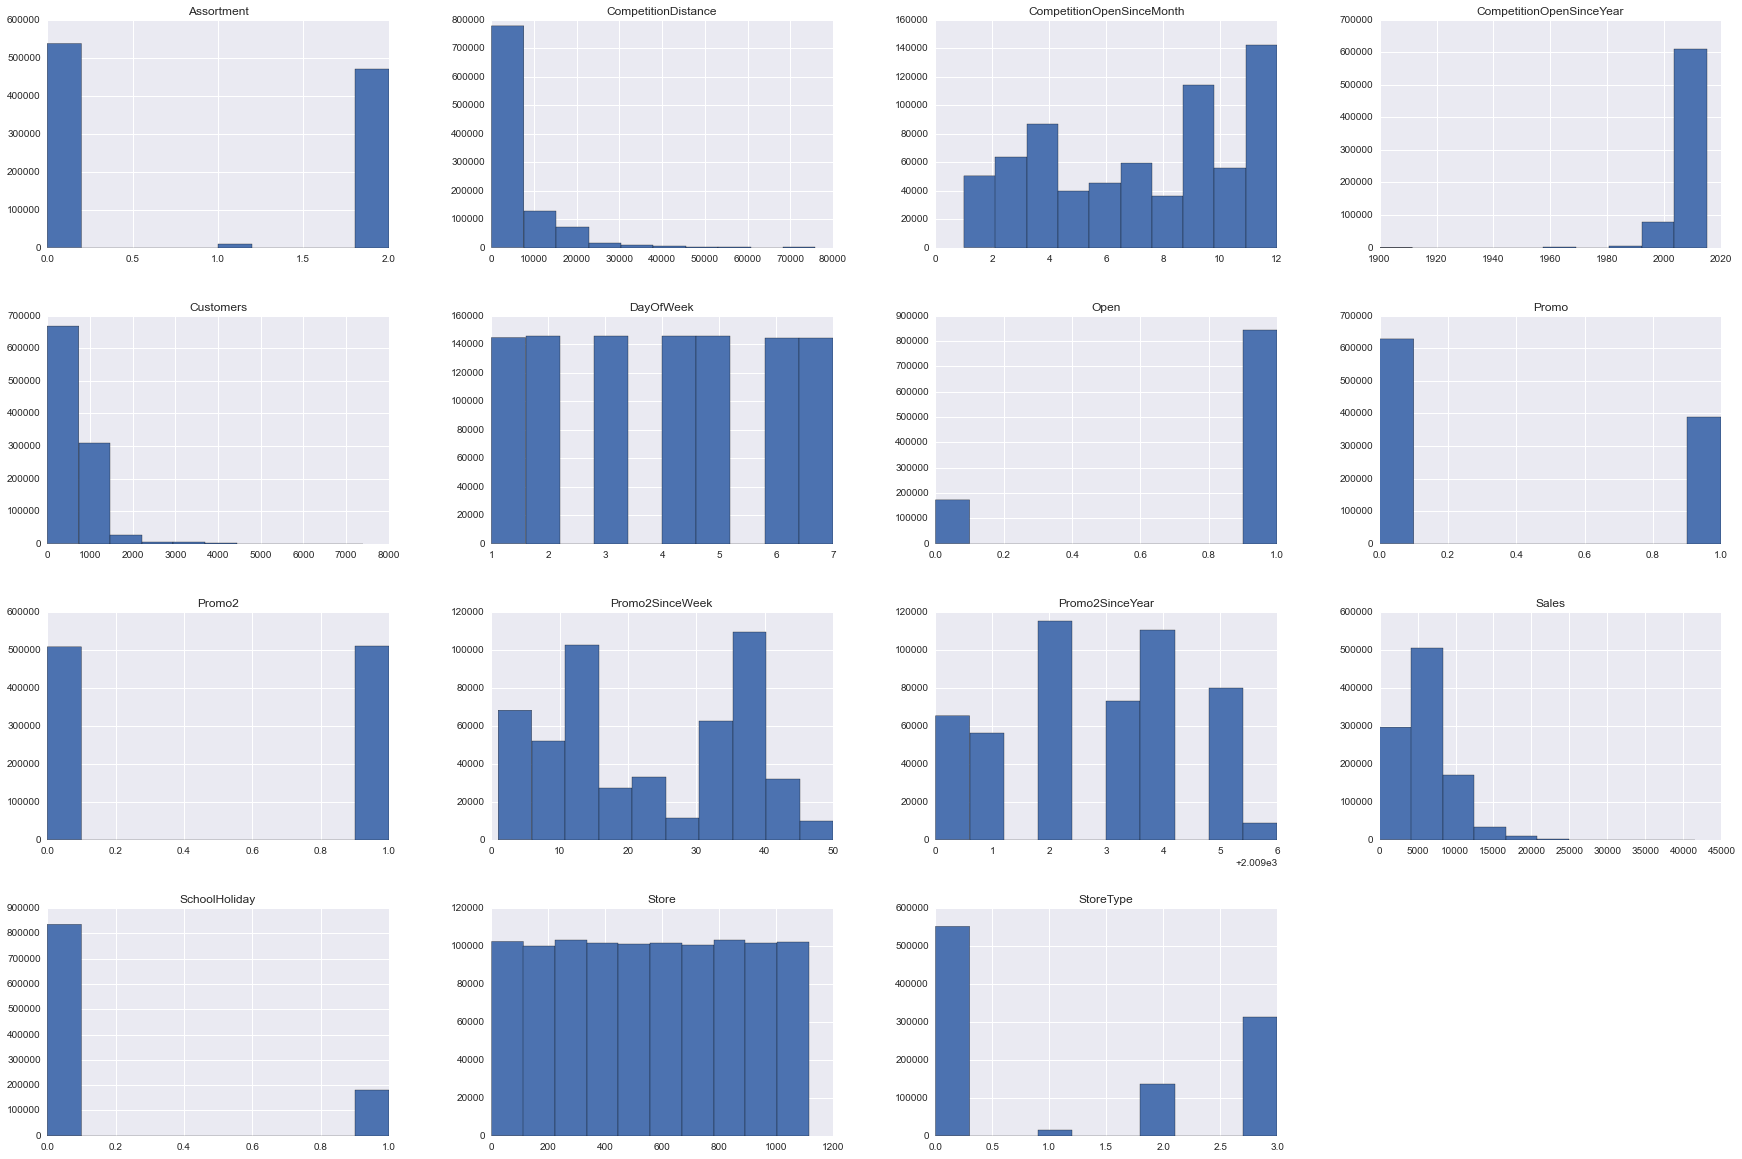

In [105]:
# Самое второе - построить гистограммы всех признаков

all_data.hist(figsize=(30, 20))

# Нет ли перекоса в сторону каких-то значений признака (к ним нужно будет внимательно относиться при обучении)
# Если представлена только одна категория - такой признак нужно удалить на этапе очистки данных! (Иначе он будет портить модель)
# Прикинуть, какому распределению может соответствовать гистограмма
# Постараться интерпретировать полученные распределения признаков, нет ли чего-нибудь странного в данных?
# Обратите особое внимание на целевой признак!

## Если речь идет о kaggle, всегда полезно сравнить гистограммы для обучающей и контрольной выборок. Если распределения каких-то признаков очень отличаются, стоит внимательно следить за этими признаками при выборе модели. 

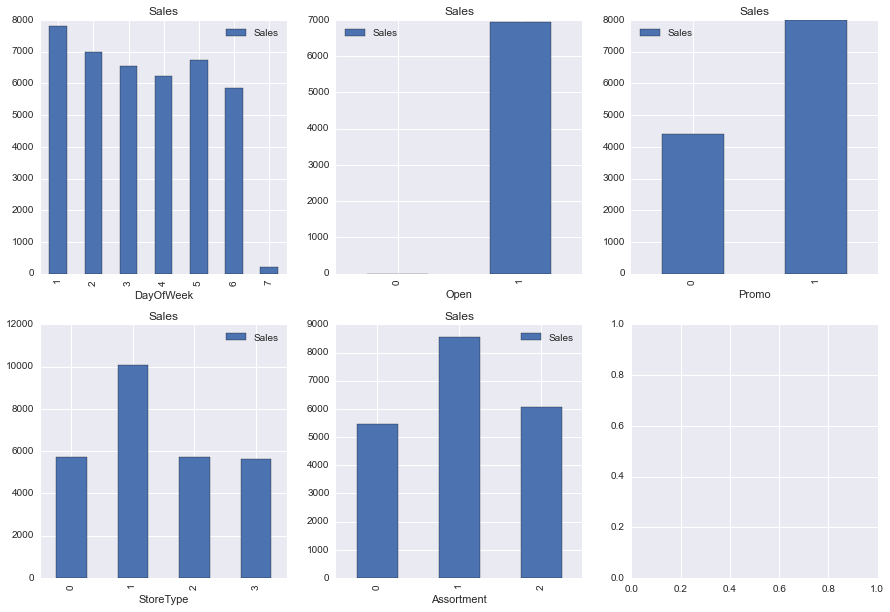

In [12]:
# Построить графики признак - целевой признак

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
i = 0
for feature in ["DayOfWeek", "Open", "Promo", "StoreType", "Assortment"]:
    # если объектов мало, можно их все отобразить на графиках:
    # all_data.plot(feature, "Sales", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4])
    
    # если данных много, будем рисовать средние по каждому значению
    if feature != "Sales" and feature != "Date" and feature != "PromoInterval" and feature != "StateHoliday":
        if len(set(all_data[feature])) > 10: # вещественный признак
            tmp = all_data[['Sales', feature]].groupby(feature).mean()
            tmp.reset_index().plot(kind="scatter", x=feature, y='Sales', subplots=True, ax=axes[i / 3, i % 3])
            i += 1
        else: # категориальный признак
            tmp = all_data[['Sales', feature]].groupby(feature).mean()
            tmp.reset_index().plot(kind="bar", x=feature, y='Sales', subplots=True, ax=axes[i / 3, i % 3])
            i += 1
            
# Каков характер зависимости?

# Не нужно ли сделать преобразования каких-нибудь признаков?

# Какую модель можно применить? 

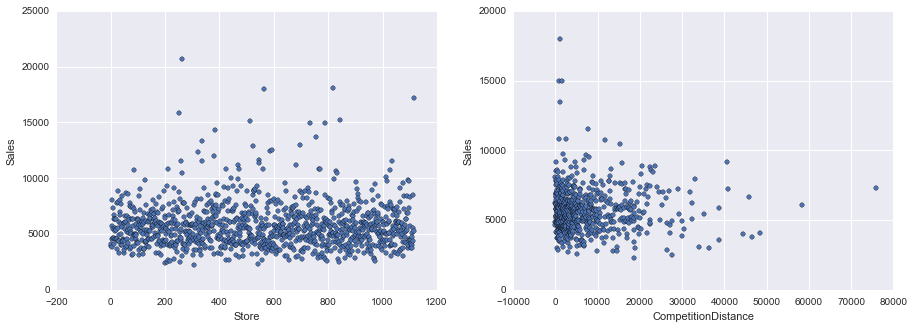

In [21]:
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


avg_per_store = all_data[['Sales', 'Store']].groupby('Store').mean()
avg_per_store.reset_index().plot(kind='scatter', x='Store', y='Sales', ax=axes[0])

avg_per_store = all_data[['Sales', 'CompetitionDistance']].groupby('CompetitionDistance').mean()
avg_per_store.reset_index().plot(kind='scatter', x='CompetitionDistance', y='Sales', ax=axes[1])
            
# Каков характер зависимости?

# Не нужно ли сделать преобразования каких-нибудь признаков?

# Какую модель можно применить? 

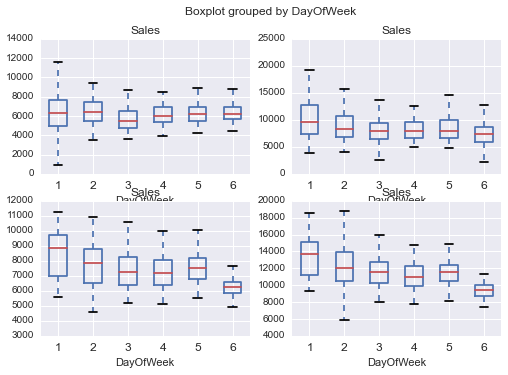

In [7]:
# Чтобы лучше ответить на вопросы после предыдущих графиков, нужно строить отдельные графики для каких-нибудь признаков.
# Тут начинается искусство и везение (не перебирать же все комбинации :)
# Посмотреть на отдельные объекты / классы / группы чего-нибудь, построить для них boxplot целевого признака. 
# Это можно проделать для разных объектов, признаков, групп.

_, ax = plt.subplots(2,2)
all_data[(all_data['Sales']!=0) & (all_data['Store']==907)].boxplot(ax=ax[0][0], column='Sales', by='DayOfWeek')
all_data[(all_data['Sales']!=0) & (all_data['Store']==905)].boxplot(ax=ax[0][1], column='Sales', by='DayOfWeek')
all_data[(all_data['Sales']!=0) & (all_data['Store']==1025)].boxplot(ax=ax[1][0], column='Sales', by='DayOfWeek')
all_data[(all_data['Sales']!=0) & (all_data['Store']==974)].boxplot(ax=ax[1][1], column='Sales', by='DayOfWeek')

# Есть ли динамика целевого признака?

# Есть ли различия между объектами?

# Постоянна ли дисперсия (высота boxplot)? Если не постоянна, то в чем могут быть причины?

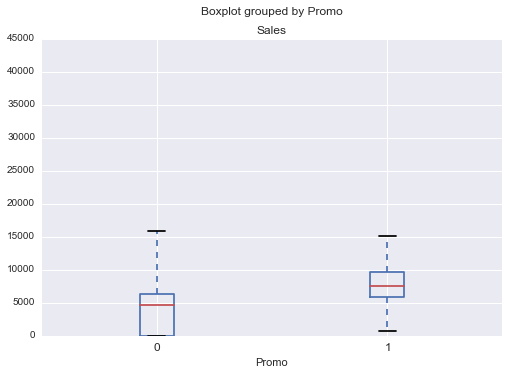

In [8]:
# Теперь для классов

all_data.boxplot(column="Sales", by="Promo")

# Интерпретируемо?

# Есть зависимость?

# Какую модель можно применить?

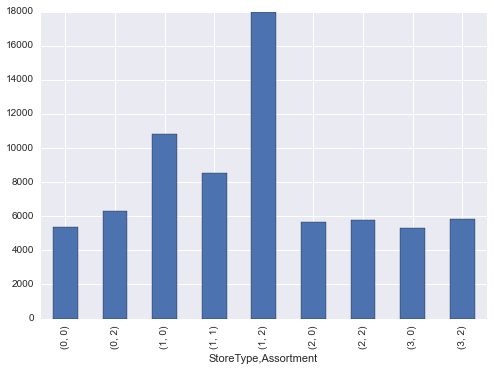

In [14]:
# Можно найти особенные комбинации признаков, особенно влияющие на целевой

ts = all_data.groupby(['StoreType', 'Assortment']).Sales.mean()
ts.plot("bar")

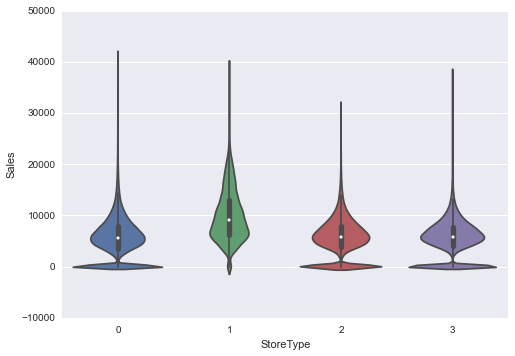

In [18]:
# Надо больше красивых картинок

seaborn.violinplot(x="StoreType", y="Sales", data=all_data, size=6)

## При выполнении визуализации для проектов нужно после каждого графика обязательно писать выводы, которые вы по нему сделали!

### Хороший пример визуализации

[https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook](https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook)